## 探索数据

In [63]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import HTML, Markdown
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tabulate import tabulate

# 读取数据
df = pd.read_csv("data/steel_plates_fault.csv")
markdown_table = tabulate(df.head(), headers='keys', tablefmt='pipe')
# 使用markdown显示
display(Markdown(markdown_table))

# 计算故障列的值分布
class_distribution = df['故障'].value_counts().to_dict()
# 获取无故障和有故障的计数
normal_count = class_distribution.get(1)
faulty_count = class_distribution.get(2)

formatted_string = f"<br><h3><b>在33种因素的影响下, {normal_count}块钢板是正常的, {faulty_count}块钢板有故障</b></h3>"
# Display the formatted string in the output cell
display(HTML(formatted_string))

|    |   X最小值 |   X最大值 |          Y最小值 |          Y最大值 |   像素面积 |   X轮廓 |   Y轮廓 |   亮度总和 |   最小亮度 |   最大亮度 |   传送带长度 |   钢材种类A300 |   钢材种类A400 |   钢板厚度 |   边缘指数 |   空指数 |   方形指数 |   外部X指数 |   边缘X指数 |   边缘Y指数 |   外部全局指数 |   面积对数 |   对数X指数 |   对数Y指数 |   方向指数 |   亮度指数 |   面积S型函数 |   类糕点缺陷 |   Z型划痕 |   K型划痕 |   污点 |   脏污 |   凹陷 |   故障 |
|---:|----------:|----------:|-----------------:|-----------------:|-----------:|--------:|--------:|-----------:|-----------:|-----------:|-------------:|---------------:|---------------:|-----------:|-----------:|---------:|-----------:|------------:|------------:|------------:|---------------:|-----------:|------------:|------------:|-----------:|-----------:|--------------:|-------------:|----------:|----------:|-------:|-------:|-------:|-------:|
|  0 |        42 |        50 | 270900           | 270944           |        267 |      17 |      44 |      24220 |         76 |        108 |         1687 |              1 |              0 |         80 |     0.0498 |   0.2415 |     0.1818 |      0.0047 |      0.4706 |      1      |              1 |     2.4265 |      0.9031 |      1.6435 |     0.8182 |    -0.2913 |        0.5822 |            1 |         0 |         0 |      0 |      0 |      0 |      1 |
|  1 |       645 |       651 |      2.53808e+06 |      2.53811e+06 |        108 |      10 |      30 |      11397 |         84 |        123 |         1687 |              1 |              0 |         80 |     0.7647 |   0.3793 |     0.2069 |      0.0036 |      0.6    |      0.9667 |              1 |     2.0334 |      0.7782 |      1.4624 |     0.7931 |    -0.1756 |        0.2984 |            1 |         0 |         0 |      0 |      0 |      0 |      1 |
|  2 |       829 |       835 |      1.55391e+06 |      1.55393e+06 |         71 |       8 |      19 |       7972 |         99 |        125 |         1623 |              1 |              0 |        100 |     0.971  |   0.3426 |     0.3333 |      0.0037 |      0.75   |      0.9474 |              1 |     1.8513 |      0.7782 |      1.2553 |     0.6667 |    -0.1228 |        0.215  |            1 |         0 |         0 |      0 |      0 |      0 |      1 |
|  3 |       853 |       860 | 369370           | 369415           |        176 |      13 |      45 |      18996 |         99 |        126 |         1353 |              0 |              1 |        290 |     0.7287 |   0.4413 |     0.1556 |      0.0052 |      0.5385 |      1      |              1 |     2.2455 |      0.8451 |      1.6532 |     0.8444 |    -0.1568 |        0.5212 |            1 |         0 |         0 |      0 |      0 |      0 |      1 |
|  4 |      1289 |      1306 | 498078           | 498335           |       2409 |      60 |     260 |     246930 |         37 |        126 |         1353 |              0 |              1 |        185 |     0.0695 |   0.4486 |     0.0662 |      0.0126 |      0.2833 |      0.9885 |              1 |     3.3818 |      1.2305 |      2.4099 |     0.9338 |    -0.1992 |        1      |            1 |         0 |         0 |      0 |      0 |      0 |      1 |

## 使用AI解决问题

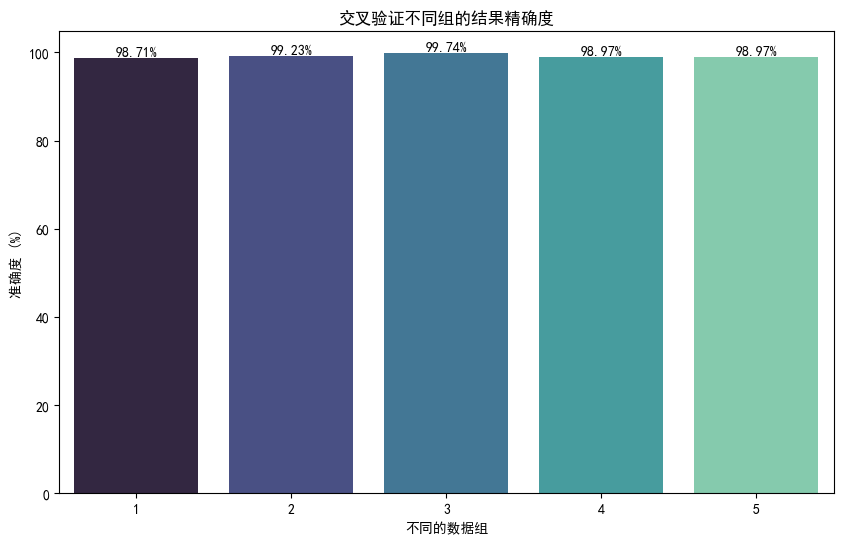

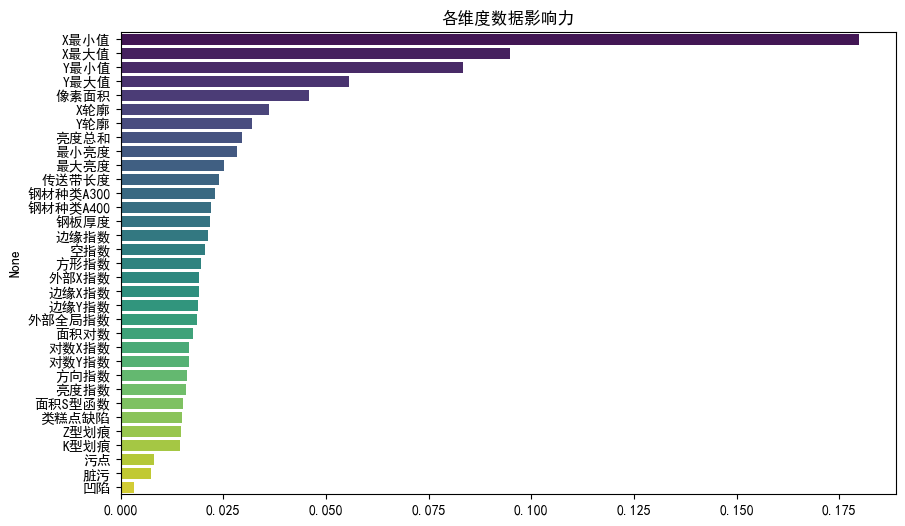

In [71]:
# Prepare features and target variable
X = df.drop('故障', axis=1)
y = df['故障']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 初始化分类器
model = RandomForestClassifier(n_estimators=50, random_state=42)

# Set up Stratified K-Fold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 得出交叉验证数据
cross_val_scores = cross_val_score(model, X_scaled, y, cv=stratified_kfold, scoring='accuracy')



import warnings
warnings.filterwarnings('ignore')

model.fit(X_scaled, y)
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = 'SimHei'
# AI模型准确度
plt.figure(figsize=(10, 6))
# 将交叉验证结果数据转为百分比
percentage_scores = [score * 100 for score in cross_val_scores]
# 画柱状图
ax = sns.barplot(x=np.arange(1, len(percentage_scores) + 1), y=percentage_scores, palette="mako")
plt.title("交叉验证不同组的结果精确度")
plt.xlabel("不同的数据组")
plt.ylabel("准确度 (%)")  # Update ylabel to show percentage
# 给数据打标签
for i, score in enumerate(percentage_scores):
    ax.text(i, score, f'{score:.2f}%', ha='center', va='bottom', color='black')  # Update the text to include a percent sign
plt.show()

# 各维度数据影响力
importances = model.feature_importances_
# 排序
indices = np.argsort(importances)[::-1]
# 画图
plt.figure(figsize=(10, 6))
plt.title("各维度数据影响力")
sns.barplot(y=X.columns, x=importances[indices], palette="viridis")
plt.show()